## Codio Activity 6.7: Conducting K-Means in Scikit-Learn

**Expected Time: 60 Minutes**

**Total Points: 24 Points**

This activity focuses on using `sklearn` to perform `KMeans` clustering.  You will compare initialization methods and determine the "right" number of clusters using an elbow plot.  The data are again produced using `sklearn`.    

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

### Creating the Data

Data are created with a known number of cluster centers to make the evaluation of the clustering more straightforward.  A dataset with three features and four clusters is created and plotted below.  Your task is to uncover these clusters using `KMeans`.  

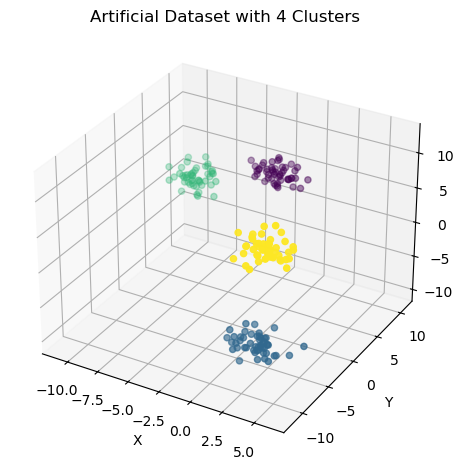

In [5]:
X, y = make_blobs(n_samples=200, n_features=3, centers = 4, random_state=42)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout();

[Back to top](#Index:) 

## Problem 1

### Instantiate `KMeans`

**4 Points**

To begin, you are to create an instance of the `KMeans` clusterer.  Slightly different than the lectures, we directly import the `KMeans` object. 

Instantiate a `KMeans()` classifier and assign the result to `kmeans`.


Inside the `KMeans()` classifier, set `random_state = 42`.

In [25]:
### GRADED

# YOUR CODE HERE
kmeans = KMeans(random_state=42)

# Answer check
print(kmeans)
print(type(kmeans))

KMeans(random_state=42)
<class 'sklearn.cluster._kmeans.KMeans'>


[Back to top](#Index:) 

## Problem 2

### Using `KMeans`

**4 Points**

To conduct the `KMeans` clustering algorithm on the data, use the `.fit()` method on `kmeans` with argument equal to `X`.  

This will run the clustering algorithm on our data and make clustering assignments accordingly.  

In [29]:
### GRADED

# YOUR CODE HERE
kmeans.fit(X)

# Answer check
print(kmeans)
print(type(kmeans))

KMeans(random_state=42)
<class 'sklearn.cluster._kmeans.KMeans'>


/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Back to top](#Index:) 

## Problem 3

### Checking the `inertia_` attribute.  

**4 Points**

After the cluster object has been fit, examine the inertia of your clusters.

To achieve this, apply the `.inertia_` attribute on `kmeans`  to retrive the inertia of each cluster.

Save your result to the variable `inertia` below.

In [33]:
### GRADED

# YOUR CODE HERE
inertia = kmeans.inertia_ 

# Answer check
print(inertia)
print(type(inertia))

412.4182266721012
<class 'float'>


[Back to top](#Index:) 

## Problem 4

### Trying different numbers of clusters

**4 Points**

Our first cluster model used 8 cluster centers.  


Below, use a `for` loop to create a list of inertia scores for models with $1, 2, 3, ..., 10$ cluster centers and append the `.inertia_` value for each to the list `inertias`.  Note that for each instance of `KMeans` you create, set `n_clusters` equal to `i` and the `random_state` equal to `42`.  

In [13]:
### GRADED

inertias = [] 
#for each value 1 - 10

       #instantiate new KMeans instance
        #Don't Forget to set the random_state!!!
        
        #fit the model
        
        #append inertia score to inertias list

# YOUR CODE HERE
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Answer check
print(inertias)
print(type(inertias))

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/pyt

[26101.998581982094, 8679.882995317123, 1713.2851336555377, 554.3359020785317, 511.90171670427924, 473.64505559838585, 434.1537681992081, 412.4182266721012, 371.26329760825035, 351.7892667212758]
<class 'list'>


/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Back to top](#Index:) 

## Problem 5

### Plotting the results

**4 Points**

Now that we have inertia values for `n_clusters` 1, 2, 3, ..., 10, a plot is drawn of the resulting centers and inertia scores.  The $x$-axis should contain the number of cluster centers and the $y$-axis should represent the inertia scores.  Uncomment the plotting code to examine a plot of these inertia values by cluster centers.  According to this plot, which do you feel is the "right" number of cluster centers for the data?  Assign your answer as an integer to `best_n_clusters` below. 

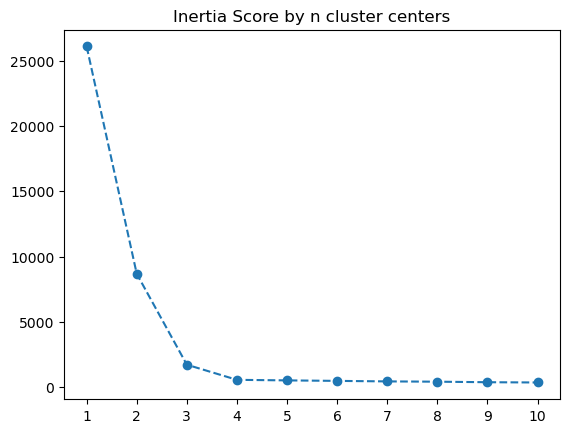

In [15]:
plt.plot(list(range(1, 11)), inertias, '--o')
plt.xticks(list(range(1, 11)), list(range(1, 11)))
plt.title('Inertia Score by n cluster centers');
plt.show()

In [19]:
### GRADED

# YOUR CODE HERE
best_n_clusters = 4

# Answer check
print(best_n_clusters)
print(type(best_n_clusters))

4
<class 'str'>


[Back to top](#Index:) 

## Problem 6

### Repeat with `random` initialization of centroids

**4 Points**

Note that by default the `KMeans` clusterer in sklearn uses `kmeans++` to initialize the center of the clusters.  

Repeat the implementation of Problem 4 where you loop over values $1, 2, 3, ..., 10$ for the `n_clusters` but now initialize the centers randomly by setting the argument `init` equal to `random`.  Be sure to set `random_state = 42` and save your list of inertias to `random_inertias`.  


Does the idea number of clusters change?  Enter your response to the best number of cluster centers when using `random` initialization to `best_n_clusters_random` as an integer below.

In [21]:
### GRADED

random_inertias = [] 
best_n_clusters_random = 4


# YOUR CODE HERE
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, random_state=42, init='random')
    kmeans.fit(X)
    random_inertias.append(kmeans.inertia_)

# Answer check
print(random_inertias)
print(type(random_inertias))

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/pyt

[26101.998581982094, 8679.882995317123, 1713.2851336555377, 554.3359020785317, 516.6886409973101, 480.52550008895906, 456.47063402322306, 421.291474372915, 395.15960226204936, 377.6141500406551]
<class 'list'>


/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


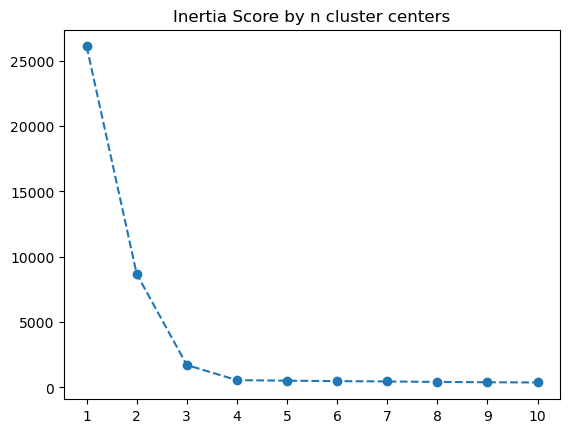

In [23]:
plt.plot(list(range(1, 11)), random_inertias, '--o')
plt.xticks(list(range(1, 11)), list(range(1, 11)))
plt.title('Inertia Score by n cluster centers');
plt.show()